In [118]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px
import matplotlib.pylab as  plt

In [119]:
data = pd.read_csv('wisconsin_data set.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
data=pd.get_dummies(data,prefix_sep='_',drop_first=True,dtype=float)
data.head(40)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN,1.0
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN,1.0
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN,1.0
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN,1.0
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN,1.0
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN,1.0
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN,1.0
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN,1.0
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN,1.0
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN,1.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [43]:
data.drop('id', axis = 1, inplace = True)

In [44]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


In [176]:
corr_data = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
          'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

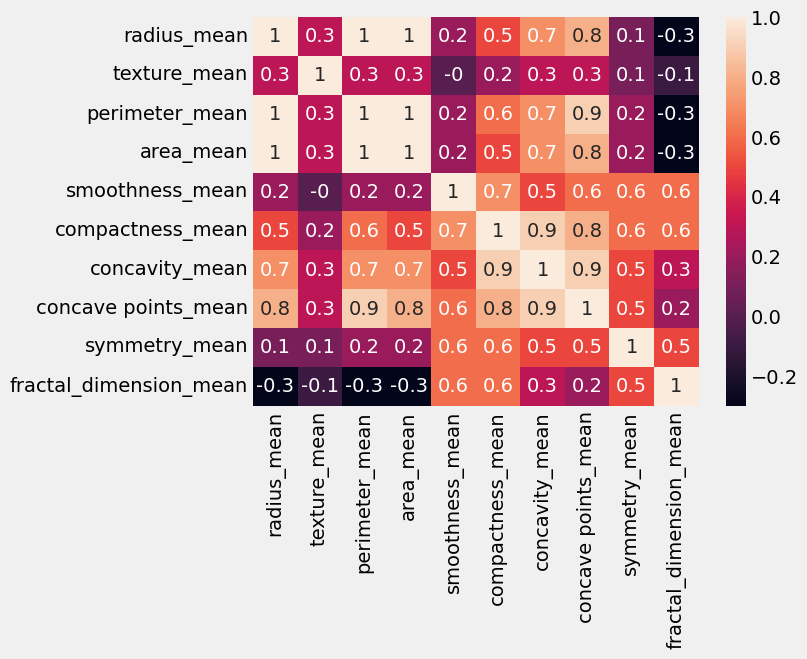

In [177]:
corr=corr_data.corr().round(1)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot=True)
plt.show()

# Positive Correlations:
Features with strong positive correlations (darker red) tend to increase together. For example, radius_mean and perimeter_mean have a strong positive correlation.
This suggests that as the radius of a tumor increases, its perimeter also tends to increase.
# Negative Correlations:
Features with negative correlations (blue) move in opposite directions. For example, smoothness_mean and compactness_mean have a negative correlation.
Higher smoothness may be associated with lower compactness.
# No Correlation:
Features with no correlation (white) do not exhibit a clear relationship.
For instance, texture_mean and fractal_dimension_mean appear to be uncorrelated.

Text(0.5, 1.0, 'Diagnosis with nuclei radius')

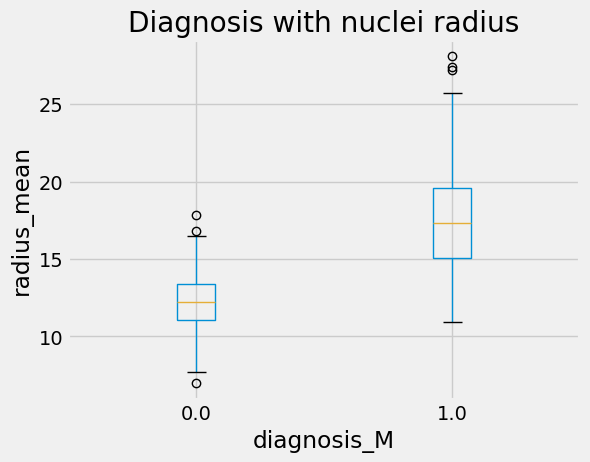

In [107]:
ax = data.boxplot(column='radius_mean' ,by='diagnosis_M')
ax.set_ylabel('radius_mean')
plt.suptitle('')  # Suppress the titles
plt.title('Diagnosis with nuclei radius')

# box plots a

The y-axis represents the mean radius of the cell nuclei (“radius_mean”), which ranges from 5 to 25. The two boxplots represent two different diagnoses. Although it’s not explicitly stated, “0.0” and “1.0” could possibly represent benign and malignant diagnoses, respectively. The boxplot for “0.0” (possibly benign) has its median around 12, indicating that half of the benign cases have a nuclei radius mean of less than 12. The boxplot for “1.0” (possibly malignant) has its median around 17, indicating that half of the malignant cases have a nuclei radius mean of more than 17. There are outliers visible in both boxplots, which are values that are significantly higher or lower than the rest of the data. The interquartile range (the box part of the boxplot) is larger for “1.0”, indicating a larger variability in the mean radius of cell nuclei for the malignant cases compared to the benign ones.

Text(0.5, 1.0, 'Diagnosis with nuclei fractional_dimension')

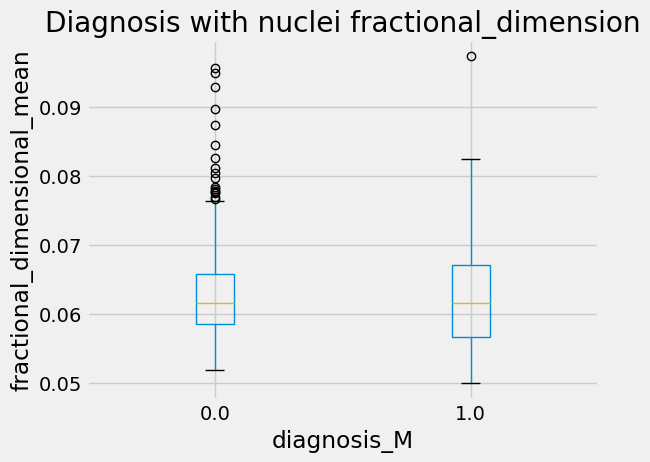

In [113]:
bx = data.boxplot(column='fractal_dimension_mean' ,by='diagnosis_M')
bx.set_ylabel('fractional_dimensional_mean')
plt.suptitle('')  # Suppress the titles
plt.title('Diagnosis with nuclei fractional_dimension') 

# BOX PLOTS B

The x-axis represents the “diagnosis_M” with two categories: ‘0.0’ and ‘1.0’. These could represent two different groups or conditions, such as benign (0.0) and malignant (1.0) diagnoses.
The y-axis represents the “fractional dimension mean”, which could be a measure of the fractal dimension of the cell nuclei in the tissue sample. The values range from approximately 0.05 to 0.09.
For category ‘0.0’, the box plot indicates lower fractional dimension mean values. The median (the line inside the box) is around 0.05, and there are no outliers (values that are significantly different from the rest of the data).
For category ‘1.0’, there are higher fractional dimension mean values. The median is around 0.07, and there are several outliers present above a value of approximately 0.08. This suggests that there is more variation in the fractional dimension of cell nuclei in malignant samples.

Text(0.5, 1.0, 'Diagnosis with nuclei compactness')

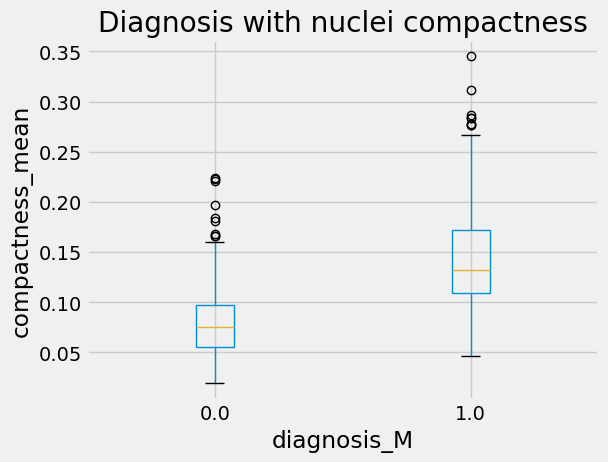

In [112]:
cx = data.boxplot(column='compactness_mean' ,by='diagnosis_M')
cx.set_ylabel('compactness_mean')
plt.suptitle('')  # Suppress the titles
plt.title('Diagnosis with nuclei compactness') 

# Box plot c

The x-axis represents the “diagnosis_M” with two categories: ‘0.0’ and ‘1.0’. These could represent two different groups or conditions, such as benign (0.0) and malignant (1.0) diagnoses.
The y-axis represents the “compactness_mean”, which could be a measure of how compact the cell nuclei are in the tissue sample. The values range from 0 to about 0.35.
For category ‘0.0’, the box plot indicates lower compactness_mean values. The median (the line inside the box) is around 0.10, and there are no outliers (values that are significantly different from the rest of the data).
For category ‘1.0’, there are higher compactness_mean values. The median is around 0.25, and there are several outliers present above a value of approximately 0.3. This suggests that there is more variation in the compactness of cell nuclei in malignant samples.
This kind of plot is useful for comparing distributions across different categories and identifying outliers or differences in variability.

# Scatter plots

<Axes: xlabel='compactness_mean', ylabel='diagnosis'>

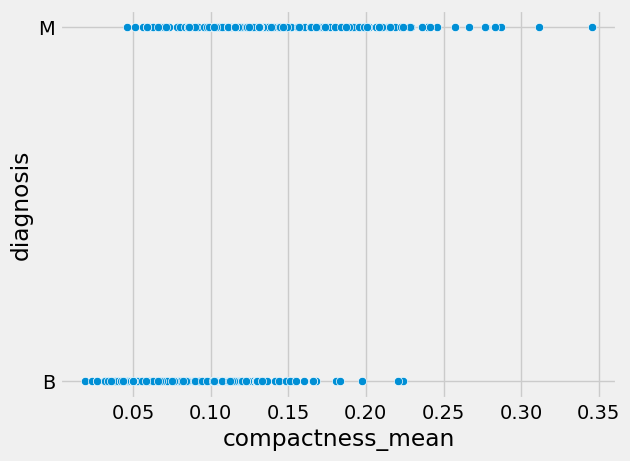

In [183]:
sns.scatterplot(x='compactness_mean',y='diagnosis',data=data)

Based on the scatterplot, we observe a positive correlation between compactness_mean and diagnosis_M.
When compactness_mean increases, the likelihood of a malignant diagnosis (diagnosis_M = 1.0) also tends to increase.
In other words, higher compactness_mean values are associated with a higher probability of cancer.

<Axes: xlabel='fractal_dimension_mean', ylabel='diagnosis'>

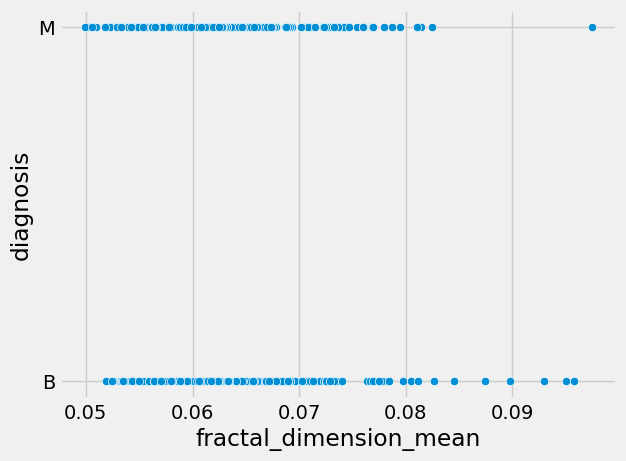

In [181]:
sns.scatterplot(x='fractal_dimension_mean',y='diagnosis',data=data)

<Axes: xlabel='radius_mean', ylabel='diagnosis'>

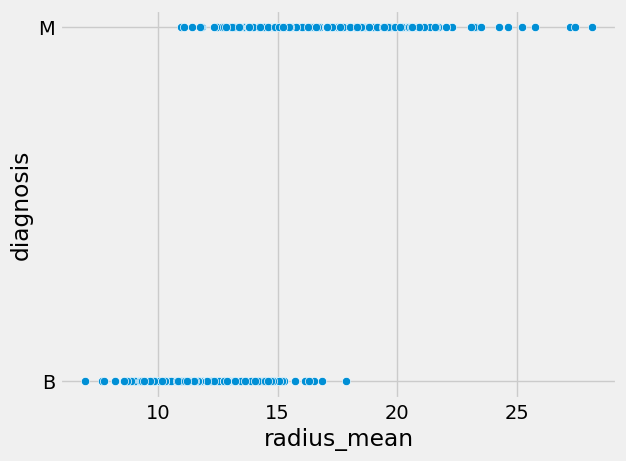

In [184]:
sns.scatterplot(x='radius_mean',y='diagnosis',data=data)

# Logistic Regression with Train and Test Split

In [161]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
          'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'
]]

In [162]:
y = data['diagnosis']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=101)
from sklearn.linear_model import LogisticRegression

In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
logmodel=LogisticRegression(fit_intercept=True)
logmodel.fit(X_train,y_train)

predictions=logmodel.predict(X_test)

print('Intercept is', logmodel.intercept_)
print('Coefficients are', logmodel.coef_)

Intercept is [-36.08154283]
Coefficients are [[-1.54617923  0.21893474  0.72795304 -0.02262313  0.31476197  0.48096332
   0.72211985  0.47877713  0.50984122  0.08810946]]


C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## An increase in perimeter_mean is associated with a higher probability of malignancy.Similarly, higher values of concavity_mean and symmetry_mean are also associated with malignancy.Conversely, negative coefficients (e.g., for area_mean) suggest that higher values of that feature are associated with a lower likelihood of malignancy.

In [166]:
logit_reg_pred=logmodel.predict(X_test)
logit_reg_proba=logmodel.predict_proba(X_test)
logit_result=pd.DataFrame({'actual': y_test,
                          'p(0)':[p[0] for p in logit_reg_proba],
                          'p(1)':[p[1] for p in logit_reg_proba],
                          'predicted':logit_reg_pred})

In [60]:
print(logit_result)

     actual      p(0)      p(1)  predicted
107     0.0  0.731349  0.268651        0.0
437     0.0  0.726974  0.273026        0.0
195     0.0  0.726348  0.273652        0.0
141     1.0  0.616366  0.383634        0.0
319     0.0  0.764775  0.235225        0.0
..      ...       ...       ...        ...
162     1.0  0.359568  0.640432        1.0
321     1.0  0.608328  0.391672        0.0
388     0.0  0.610111  0.389889        0.0
176     0.0  0.555559  0.444441        0.0
222     0.0  0.731064  0.268936        0.0

[228 rows x 4 columns]


In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.84       145
         1.0       0.94      0.39      0.55        83

    accuracy                           0.77       228
   macro avg       0.84      0.69      0.70       228
weighted avg       0.81      0.77      0.74       228



In [46]:
print(confusion_matrix(y_test,predictions))

[[143   2]
 [ 51  32]]


# random forest 
When utilizing a Random Forest Classifier for this analysis, you can gain insights into feature importance rankings that indicate which nuclei characteristics or texture-related features are most influential in predicting diagnostic outcomes. The classifier can also provide accuracy metrics such as precision, recall, F1-score, and ROC curves to assess the model’s performance in distinguishing between different diagnoses based on input features.



In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [170]:
rfc_pred=rfc.predict(X_test)

In [171]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[131  14]
 [ 11  72]]


              precision    recall  f1-score   support

           B       0.92      0.90      0.91       145
           M       0.84      0.87      0.85        83

    accuracy                           0.89       228
   macro avg       0.88      0.89      0.88       228
weighted avg       0.89      0.89      0.89       228



# Logistic Regression:
Logistic regression is a widely used statistical method for binary classification. It models the probability of a binary outcome (such as 0 or 1) based on one or more predictor variables.
In the context of the given code, logistic regression is used to predict the onset of diabetes (binary classification problem) based on eight numeric input variables.
The classification report provides details on precision, recall, F1-score, and support for both classes (0.0 and 1.0).
The accuracy achieved by the logistic regression model is approximately 77%.
# Random Forest Classifier (RFC):
Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.
In the code, an RFC model is used to predict the same binary outcome (diabetes onset) based on the same input variables.
The classification report for RFC shows precision, recall, F1-score, and support for both classes (B and M).
The accuracy achieved by the RFC model is approximately 89%.
Comparison and Interpretation:

# Logistic Regression:
Higher precision (94%) for class 1  but lower recall (39%).
F1-score balances precision and recall.
Overall accuracy: 77%.
# Random Forest Classifier:
Balanced precision (84%) and recall (87%) for both classes.
Overall accuracy: 89%.
Choosing between these models depends on the specific problem and the trade-off between precision and recall. Logistic regression may be preferred when avoiding false positives (precision) is critical, while RFC provides a balanced approach